<a href="https://colab.research.google.com/github/hatalsky/Python_Class_DATA201/blob/Capstone-Project/DATA201_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Meteorite_Landings.csv')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


landing page for data: https://catalog.data.gov/dataset/meteorite-landings
more details from NASA: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/about_data

The dataset contains the following variables:

*   name: the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
*   id: a unique identifier for the meteorite
*   nametype: one of: -- valid: a typical meteorite -- relict: a meteorite that has been highly degraded by weather on Earth
*   recclass: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)
*   mass: the mass of the meteorite, in grams
*   fall: whether the meteorite was seen falling, or was discovered after its impact; one of: -- Fell: the meteorite's fall was observed -- Found: the meteorite's fall was not observed
*   year: the year the meteorite fell, or the year it was found (depending on the value of fell)
*   reclat: the latitude of the meteorite's landing
*   reclong: the longitude of the meteorite's landing
*   GeoLocation: a parentheses-enclose, comma-separated tuple that combines reclat and reclong

In [ ]:
#getting to know the data's basics
df.shape

(45716, 10)

In [ ]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [ ]:
df.nametype.unique()

array(['Valid', 'Relict'], dtype=object)

documentation says that "valid" is most meteorites and "relict" is when a meteorite has been degraded by weather on earth

In [ ]:
df.recclass.unique()

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an', 'LL5',
       'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'L4', 'Aubrite',
       'Iron, IIAB', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Iron?', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB',
       'H/L4', 'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6',
       'H3.8', 'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6',
       'Ureilite', 'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3',
       'EH3/4-an', 'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4',
       'H?', 'H3-6', 'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron',
       'CR2', 'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6',
       'LL3.2', 'Pallasite', 'CO

In [ ]:
#taking a look at the mass of the meteorites
df['mass (g)'].unique()

array([2.100e+01, 7.200e+02, 1.070e+05, ..., 9.000e+05, 1.475e+03,
       2.167e+03])

In [ ]:
df.groupby(['mass (g)'])['id'].count().sort_values(ascending=True)

mass (g)
60000000.00      1
298.93           1
299.65           1
300.40           1
300.50           1
              ... 
2.40           126
2.10           130
1.40           138
1.20           140
1.30           171
Name: id, Length: 12576, dtype: int64

largest meteorite observed was 60 million grams (more than 132,000 lbs) with the smallest one at 1.3 grams (171 meteorites came in at this weight)

In [ ]:
#60 million grams seems a bit weird, and an outlier. Looking into the specific record further
df. loc[df['mass (g)'] == 60000000.00]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)"


Hoba meteorite background: https://en.wikipedia.org/wiki/Hoba_meteorite

Row in dataset is valid, as is.

In [ ]:
#taking a look at the 'fall' variable
df.fall.unique()

array(['Fell', 'Found'], dtype=object)

Total Fell Count:  1107 
Total Found Count:  44609


<Axes: xlabel='fall', ylabel='count'>

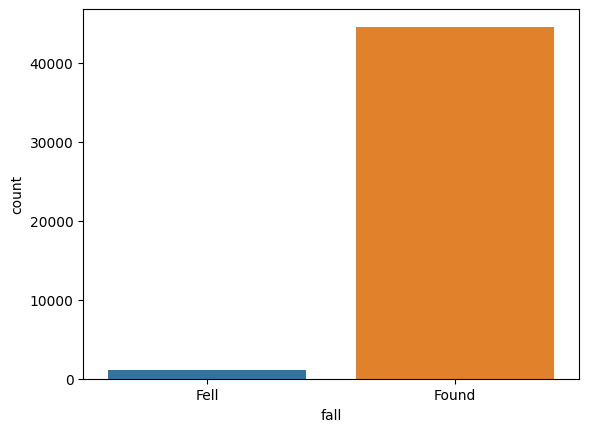

In [ ]:
print('Total Fell Count: ',df.fall.value_counts()['Fell'],
      '\nTotal Found Count: ', df.fall.value_counts()['Found'])

sns.countplot(x='fall',data=df)

the vast majority of the meteorites were found after impact, very few were observed as they fell to the earth.

<Axes: xlabel='year', ylabel='fall'>

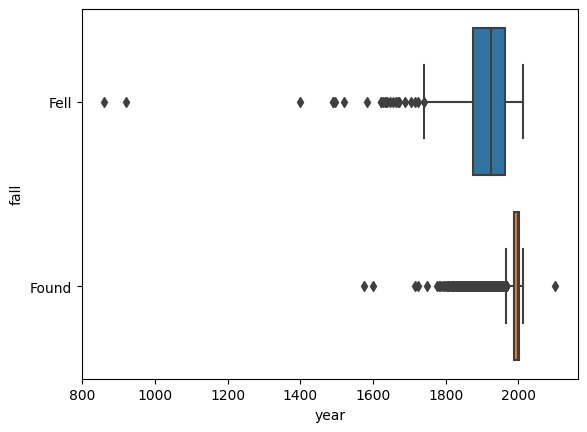

In [ ]:
#wanted to see if there was a difference over time in Fell/Found categories
sns.boxplot(data=df, x="year", y="fall")

A few outliers observed in meteorites that were observed in the sky as they fell from early in time and were later confirmed as meteorites.

In [ ]:
#looking into 'year variable'
df.year.unique()

array([1880., 1951., 1952., 1976., 1902., 1919., 1949., 1814., 1930.,
       1920., 1974., 1925., 1769., 1838., 1959., 1981., 1957., 2001.,
       1806., 1766., 2002., 1835., 1873., 1860., 1900., 1883., 1899.,
       1969., 2008., 1977., 1895., 1898., 1939.,   nan, 1822., 1869.,
       1942., 1971., 1984., 1914., 1803., 1954., 1932., 1950., 1805.,
       2009., 1923., 1886., 1896., 1933., 1945., 1836., 1865., 1842.,
       1858., 1908., 1855., 1968., 1938., 1934., 1929., 1922., 1907.,
       1993., 1871., 1892., 1913., 1790., 1704., 1904., 1910., 1965.,
       2006., 1994., 2012., 1989., 1916., 1893., 1961., 1937., 1798.,
       2004., 1943., 1924., 1811., 1859., 1921., 1877., 1940., 1905.,
       1827., 1887., 1999., 1843., 1796., 1941., 1906., 1909., 1833.,
       1804., 1962., 1808., 1894., 1852., 1812., 1823., 2003., 2011.,
       1847., 1956., 1960., 1964., 2007., 1990., 1946., 1863., 1861.,
       1870., 1991., 1866., 1973., 1846., 1874., 1791., 1848., 1583.,
       1810., 1988.,

In [ ]:
#looking at datatype for 'year' variable, since the periods after the years struck me as strange
print(type('year'))

<class 'str'>


In [ ]:
#there appears to be a record for a meteorite found in "2101." Look into this record.
df. loc[df['year'] == 2101.]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)"


Year found for meteorite Northwest Africa 7701 is a typo in this record: https://www.lpi.usra.edu/meteor/metbull.php?code=57150
Should be corrected to 2010.  Also, the geolocation data appears to be non-standard missing data values '0.0'

In [ ]:
#correcting the typo on year for NW Africa 7701
df.at[30682, 'year'] = 2010.

In [ ]:
#reviewing record to ensure typo was corrected
df. loc[df['id'] == 57150]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2010.0,0.0,0.0,"(0.0, 0.0)"


In [ ]:
#year found 860 - looking into this record
df. loc[df['year'] == 860.]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.725,130.75,"(33.725, 130.75)"


Additional info on Nogota meteorite: https://en.wikipedia.org/wiki/N%C5%8Dgata_meteorite
860 is the year it was observed by a young boy in Japan. It was later confirmed to be a meteorite. Record is valid as is. Going to assume that this is likely the case with the outliers that were observed earlier in time.

In [ ]:
# convert 'year' variable from string datatype to integer
df['year'] = pd.to_numeric(df['year'])
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
#year that most meteorites were found/observed
df.groupby(['year'])['id'].count().sort_values(ascending=False)

year
2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1769.0       1
1766.0       1
1751.0       1
1750.0       1
860.0        1
Name: id, Length: 264, dtype: int64

<Axes: xlabel='year', ylabel='fall'>

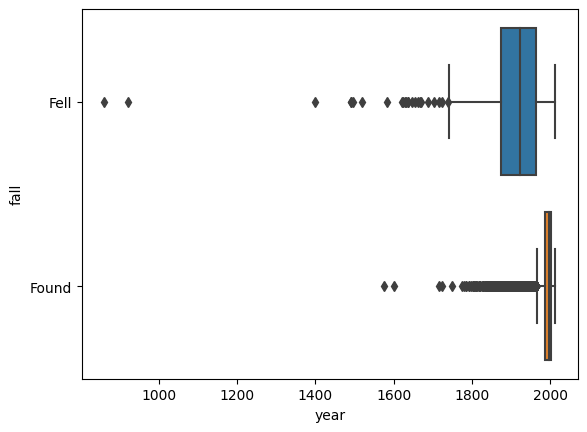

In [ ]:
sns.boxplot(data=df, x="year", y="fall")

In [ ]:
#looking into geolocation variables
df.GeoLocation.unique()

array(['(50.775, 6.08333)', '(56.18333, 10.23333)', '(54.21667, -113.0)',
       ..., '(49.25, 17.66667)', '(49.78917, 41.5046)',
       '(33.98333, -115.68333)'], dtype=object)

In [ ]:
#this didn't help identify non-standard missing data. looking into incidence of '0.0'
print(df['reclat'].value_counts()[0.0])

6438


In [ ]:
print(df['reclong'].value_counts()[0.0])

6214


Need to identify rows where lat & long are both 0.0 and investigate further.

In [ ]:
print(df['GeoLocation'].value_counts()['(0.0, 0.0)'])

6214


While it seems quite plausible that some meteorites might be discovered at latitude 0.0 or latitude 0.0, more than 6,000 meteorites landing at this specific location seems highly unlikely. I suspect that this is just a non-standard missing value.  I'm going to take a closer look at this set of 6,000+ meteorites just to be certain.

In [ ]:
#creating a df of just 'null island' meteorites
df_nullisland=df[df['GeoLocation']== '(0.0, 0.0)']
df_nullisland.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.80,Found,NaN,0.0,0.0,"(0.0, 0.0)"
597,Mason Gully,53653,Valid,H5,24.54,Fell,2010.0,0.0,0.0,"(0.0, 0.0)"
1655,Allan Hills 09004,52119,Valid,Howardite,221.70,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1656,Allan Hills 09005,55797,Valid,L5,122.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1657,Allan Hills 09006,55798,Valid,H5,104.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"


<Axes: xlabel='year', ylabel='fall'>

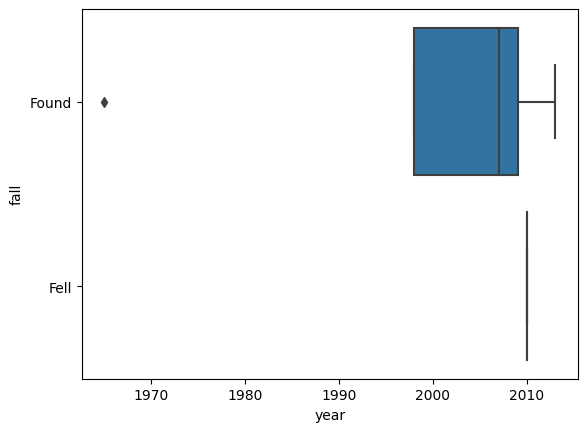

In [ ]:
#looking at the year distributions of null island meteorites
sns.boxplot(data=df_nullisland, x="year", y="fall")

Using the Meteorical Society's database (https://www.lpi.usra.edu/meteor/metbull.php), meteorites with geolocations at null island (0.0, 0.0), is just another way to say that their location of discovery is unknown. It appears that this may have been a coding technique used for the data that started in the late 1990s.

After elucidating some of the quirks of this dataset, I'll now set out to answer two research questions:

1. Are meteorites becoming increasingly dangerous over time? e.g. is there a trend line of mass going up over time?

2. are there locations on earth that are particularly prone to meteorite landings?

<Axes: xlabel='year', ylabel='mass (g)'>

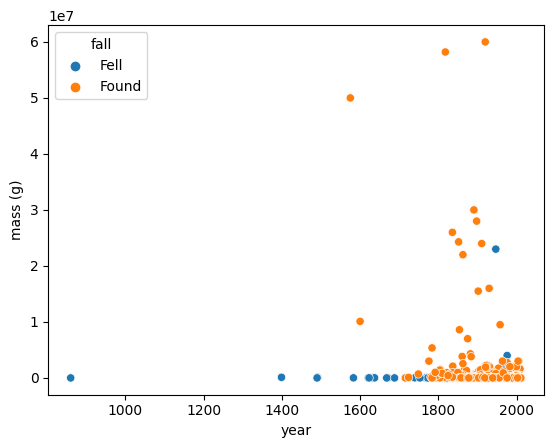

In [ ]:
#basic plot to see if weight of meteorites varies over time with distinctions between those that were found vs observed (while they 'fell')
sns.scatterplot(data=df, x="year", y="mass (g)", hue="fall")

In [ ]:
import plotly.express as px

In [ ]:
#wanted to create the same scatterplot with a bit more interactivity to explore
fig = px.scatter(df, x='year', y='mass (g)')
fig.show()

<Axes: xlabel='year', ylabel='mass (g)'>

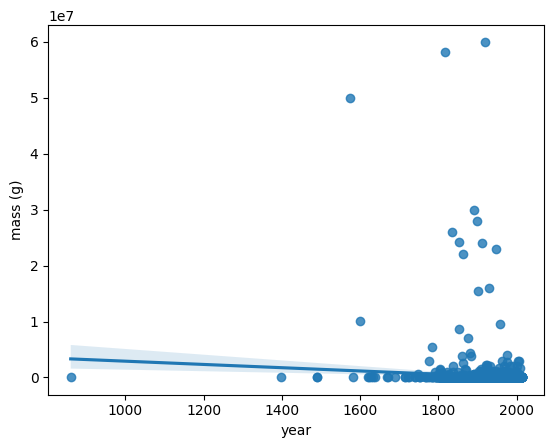

In [ ]:
#creating a scatterplot with a regression line to see which way the trend is moving
sns.regplot(data=df, x="year", y="mass (g)")

The trend line, if anything is actually sloping downward over time.  However, I don't thinkt his actually answers my question and is more a reflection of the fact that (1) most meteorites discovered are relatively small, and (2) most meteorite discoveries have happened relatively recently.  Therefore, to draw more definitive conclusions, I'm going to create a new dataframe that (1) limits the time period to more modern discoveries, and (2) excludes miniscule meteorites

<Axes: xlabel='mass (g)'>

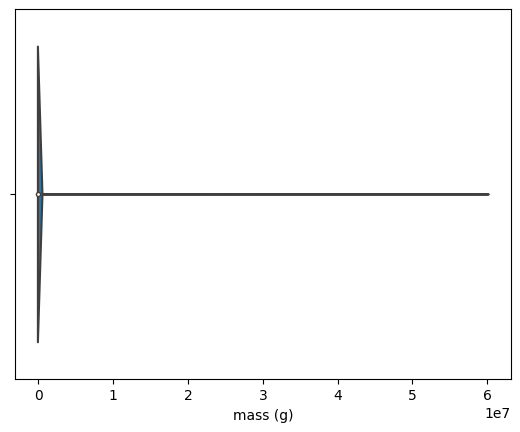

In [ ]:
#exploring the distribution of the mass of meteorites to try and develop a cutoff point for a new dataframe
sns.violinplot(x=df["mass (g)"])

This plot, honestly, doesn't tell us much. Other than the vast majority of meteorites discovered are quite small. Going to make a more manual approach below.

In [ ]:
#somewhat arbitrarily, looking to see how many meteorites in the dataset weigh more than 1,000 grams (a little more than 2.2 lbs)
print(len(df[df['mass (g)'] > 1000]))

4823


This looks to be roughly less than 10% of the overall rows

In [ ]:
#somewhat arbitrarily, looking to see how many meteorites in the dataset weigh more than 1 million grams (~2,200 lbs)
print(len(df[df['mass (g)'] > 1000000]))

52


52 rows is far too few observations to develop any conclusions.

In [ ]:
#somewhat arbitrarily, looking to see how many meteorites in the dataset were seen/discovered after 1900
print(len(df[df['year'] > 1900]))

44680


keeps the vast majority of the dataframe

In [ ]:
#creating a new dataframe wherein the mass is greater than 1,000 grams and the year is 1900 onward
df_danger = df[(df['mass (g)'] > 1000) & (df['year'] > 1900)]
df_danger.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [ ]:
df_danger.shape

(4217, 10)

<Axes: xlabel='year', ylabel='mass (g)'>

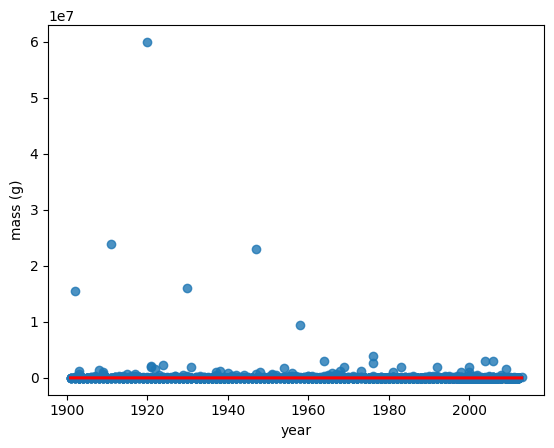

In [ ]:
#now with new dataframe that limits to a more modern dataset and includes the smallest meteorites, going to take a look at trend line
sns.regplot(data=df_danger, x="year", y="mass (g)",  line_kws=dict(color="r"), robust=True)

Although this is a significantly smaller dataset evaluating just the most recent and potentially dangerous ~4,200 meteorites, the regression line is  more or less flat. Therefore, based on this dataset, I consider there to be very little relationship between time and dangerous meteorites.  And those that *do* pose a threat occur (more or less) at random.

In [ ]:
#now turning to my other research question about locations on earth and their susceptibility to meteorite strikes
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

going to need to create a dataframe that excludes records wherein the location is unknown (null island analysis is above in cells 54 & 55).  There are also more than 7,300 rows werein the geolocation is a standard missing value (NaN) from cell 8 above.

In [ ]:
# creating a new dataframe (df_world) that drops Geolocations at null island (location unknown) and those with standard missing values
df_world = df[(df['GeoLocation'] != '(0.0, 0.0)')]
df_world = df_world.dropna(subset=['GeoLocation'])
df_world.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
df_world.isnull().sum()

name             0
id               0
nametype         0
recclass         0
mass (g)       119
fall             0
year           150
reclat           0
reclong          0
GeoLocation      0
dtype: int64

In [ ]:
#decided to include mass as part of my analysis on locations.  Therefore, dropping NaN records from mass column too
df_world = df_world.dropna(subset=['mass (g)'])

In [ ]:
fig = px.scatter_geo(df_world, locations="GeoLocation", size="mass (g)",color="fall", hover_name="name")
fig.show()

Map above doesn't appear to be showing anything. Going to try a different style map

In [ ]:
#plotting locations of meteorite discoveries
fig = px.density_mapbox(df_world, lat='reclat', lon='reclong', z='mass (g)', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="open-street-map")
fig.show()

From this map, there appear to by a number of hotspots across the globe for meteorite discovery/impact including, but not limited to --


*  Northwestern Greenland
*  Namibia
* Argentina
*   Western North America including Arizona, Chihuanhua (Mexico)

However, because this map accounts for mass, the largest meteorites have an outsized impact on the map.



In [ ]:
#removing mass from the depiction, can just get a snapshot of where meteorites are discovered, irrespective of size
fig = px.density_mapbox(df_world, lat='reclat', lon='reclong', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="open-street-map")
fig.show()

Once you take mass out of the equation, you can see that most parts of the earth have had a number of meteor strikes.  From this view, it is easier to spot the areas that seem to have a noticeable LACK of meteorite strikes. They includes --

*   Central portions of South America (parts of Brazil, Bolivia, and Peru)
* Portions of Canada (especially Eastern Canada and western most Canada)
*   most of Russia
*   most of Greenland
*   Western China
*   Khazakstan
*   Parts of Indonesia and Malaysia
*   Portions of African including Chad, DRC, Congo, Gabon

While this is interesting, it is also notable that many of these "safe zones" are unexplored or uninhabitable. So, the fact that there aren't meteorites in the dataset may reflect more that humans aren't there or haven't explored it with these purposes in mind.







